In [1]:
%reset -f

In [2]:
import numpy as np
import pandas as pd
import datetime
import requests
import matplotlib.pyplot as plt

api_key = pd.read_json('fmp_api_key.json').iloc[0].to_list()[0]
headers = {'Content-Type': 'application/json'}

In [3]:
### Financial Statements

def get_income_statement(ticker, period):
    """ 
    Inputs: stock ticker and period of income_statement ('FY' or 'quarter'). 
            Inputs must be of string type.
    Outputs: pandas dataframe for income statement with revenues and expenses given in millions.  
    """  
    if period == 'FY':
        limit = 120
    else:
        limit = 400
        
    response = requests.get("https://financialmodelingprep.com/api/v3/income-statement/" +
                       ticker + "?period=" + period + "&limit=" + str(limit) + "&apikey=" + api_key, headers=headers)    
    df = pd.json_normalize(response.json())
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    
    return df

def get_balance_sheet_statement(ticker, period):
    """ 
    Inputs: stock ticker and period of balance-sheet-statement ('FY' or 'quarter'). 
            Inputs must be of string type.
    Outputs: pandas dataframe for balance-sheet-statement in $millions.  
    """   
    if period == 'FY':
        limit = 120
    else:
        limit = 400
    response = requests.get("https://financialmodelingprep.com/api/v3/balance-sheet-statement/" +
                       ticker + "?period=" + period + "&limit=" + str(limit) + "&apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    
    return df

def get_cash_flow_statement(ticker, period):
    """ 
    Inputs: stock ticker and period of cash-flow-statement ('FY' or 'quarter'). 
            Inputs must be of string type.
    Outputs: pandas dataframe for cash-flow-statement in $millions.  
    """   
    if period == 'FY':
        limit = 120
    else:
        limit = 400
    response = requests.get("https://financialmodelingprep.com/api/v3/cash-flow-statement/" +
                       ticker + "?period=" + period + "&limit=" + str(limit) + "&apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    
    return df

### Financial Statements Growth
def get_income_statement_growth(ticker, period='FY'):
    """ 
    Inputs: stock ticker and period of income-statement-growth ('FY' only). 
            Inputs must be of string type.
    Outputs: pandas dataframe for income-statement-growth. 
    """
    response = requests.get("https://financialmodelingprep.com/api/v3/income-statement-growth/" +
                       ticker + "?period=" + period + "&apikey=" + api_key, headers=headers)    
    df = pd.json_normalize(response.json())
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    
    return df

def get_balance_sheet_statement_growth(ticker, period='FY'):
    """ 
    Inputs: stock ticker and period of balance-sheet-statement-growth ('FY' or 'quarter'). 
            Inputs must be of string type.
    Outputs: pandas dataframe for balance-sheet-statement-growth.
    """   
    response = requests.get("https://financialmodelingprep.com/api/v3/balance-sheet-statement-growth/" +
                       ticker + "?period=" + period + "&apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    
    return df

def get_cash_flow_statement_growth(ticker, period='FY'):
    """ 
    Inputs: stock ticker and period of cash-flow-statement-growth ('FY' or 'quarter'). 
            Inputs must be of string type.
    Outputs: pandas dataframe for cash-flow-statement-growth.
    """   
    response = requests.get("https://financialmodelingprep.com/api/v3/cash-flow-statement-growth/" +
                       ticker + "?period=" + period + "&apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    
    return df

### Company Financial Ratios
def get_financial_ratios_ttm(ticker):
    """ 
    Inputs: stock ticker (type: string)
    Outputs: pandas dataframe for company TTM ratios
    """   
    response = requests.get("https://financialmodelingprep.com/api/v3/ratios-ttm/" +
                       ticker + "?apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    
    return df

def get_financial_ratios(ticker, period):
    """ 
    Inputs: stock ticker and period ('FY' or 'quarter')
            Inputs must be of string type.
    Outputs: pandas dataframe for company ratios
    """   
    if period == 'FY':
        limit = 40
    else:
        limit = 140
    response = requests.get("https://financialmodelingprep.com/api/v3/ratios/" +
                       ticker + "?period=" + period + "&limit=" + str(limit) + "&apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    
    return df


### Company Key Metrics
def get_key_metrics_ttm(ticker):
    """ 
    Inputs: stock ticker (type: string)
    Outputs: pandas dataframe for company TTM key metrics
    """   
    response = requests.get("https://financialmodelingprep.com/api/v3/key-metrics-ttm/" +
                       ticker + "?limit=40" + "&apikey=" + api_key, headers=headers)
    if response.json() != []:
        df = pd.json_normalize(response.json())        
        return df
    
    else:
        pass
    
def get_key_metrics(ticker, period):
    """ 
    Inputs: stock ticker and period ('FY' or 'quarter')
            Inputs must be of string type.
    Outputs: pandas dataframe for company key metrics
    """   
    if period == 'FY':
        limit = 40
    else:
        limit = 130
        
    response = requests.get("https://financialmodelingprep.com/api/v3/key-metrics/" +
                       ticker + "?period=" + period + "&limit=" + str(limit) + "&apikey=" + api_key, headers=headers)
    if response.json() != []:
        df = pd.json_normalize(response.json())
        df['date'] = pd.to_datetime(df['date'])
        df.set_index(['symbol', 'date'], inplace=True)
        
        return df
    
    else:
        pass

### Company Financial Growth
def get_financial_growth(ticker, period):
    """ 
    Inputs: stock ticker and period ('FY' or 'quarter')
            Inputs must be of string type.
    Outputs: pandas dataframe for company financial growth
    """   
    if period == 'FY':
        limit = 20
    else:
        limit = 80
    response = requests.get("https://financialmodelingprep.com/api/v3/financial-growth/" +
                       ticker + "?period=" + period + "&limit=" + str(limit) + "&apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    
    return df

### Company Discounted cash flow value
def get_discounted_cash_flow(ticker):
    """ 
    Inputs: stock ticker and period ('FY' or 'quarter')
            Inputs must be of string type.
    Outputs: pandas dataframe for company discounted cash flow
    """   
    response = requests.get("https://financialmodelingprep.com/api/v3/discounted-cash-flow/" +
                       ticker + "?apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    
    return df

def get_hist_discounted_cash_flow(ticker, period):
    """ 
    Inputs: stock ticker and period ('FY' or 'quarter')
            Inputs must be of string type.
    Outputs: pandas dataframe for company historical discounted cash flow
    """   
    response = requests.get("https://financialmodelingprep.com/api/v3/historical-discounted-cash-flow/" +
                       ticker + "?period=" + period + "&apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json()[0]['historicalDCF'])
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['date'], inplace=True)
        
    return df

def get_hist_discounted_cash_flow_daily(ticker):
    """ 
    Inputs: stock ticker and period ('FY' or 'quarter')
            Inputs must be of string type.
    Outputs: pandas dataframe for company daily historical discounted cash flow
    """   
    response = requests.get("https://financialmodelingprep.com/api/v3/historical-daily-discounted-cash-flow/" +
                       ticker + "?apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    
    return df

# Earnings Calendar
def get_earnings_calendar():
    """ 
    Inputs: none
    Outputs: dataframe for earnings calendar
    """   
    response = requests.get("https://financialmodelingprep.com/api/v3/earning_calendar/" +
                       "?apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    
    return df

# Company Profile
def get_profile(ticker):
    """
    Inputs: stock ticker in string type
    Outputs: pandas dataframe for company profile
    """
    response = requests.get("https://financialmodelingprep.com/api/v3/profile/" +
                       ticker + "?apikey=" + api_key, headers=headers)
    if response.json() != []:
        df = pd.json_normalize(response.json())
        
        return df.transpose()
    
    else:
        pass

# Institutional holders
def get_institutional_holder(ticker):
    """
    Inputs: stock ticker in string type
    Outputs: dataframe for institutional holders
    """
    response = requests.get("https://financialmodelingprep.com/api/v3/institutional-holder/" +
                       ticker + "?apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())    
    
    return df

# Earnings Surprises
def get_earnings_surprises(ticker):
    """
    Inputs: stock ticker in string type
    Outputs: pandas dataframe for company earning-surprises
    """
    response = requests.get("https://financialmodelingprep.com/api/v3/earnings-surprises/" +
                       ticker + "?apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    df['earningSurprise'] =  ((df['actualEarningResult'] - df['estimatedEarning']) / abs(df['estimatedEarning'])) * 100
    
    return df

# Key Executives
def get_key_executives(ticker):
    """
    Inputs: stock ticker in string type
    Outputs: pandas dataframe for company key executives
    """
    response = requests.get("https://financialmodelingprep.com/api/v3/key-executives/" +
                       ticker + "?apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    
    return df

### Stock Screener
- marketCapMoreThan & marketCapLowerThan : Number
- priceMoreThan & priceLowerThan : Number
- betaMoreThan & betaLowerThan : Number
- volumeMoreThan & volumeLowerThan : Number
- dividendMoreThan & dividendLowerThan : Number
- isEtf & isActivelyTrading : true/false
- sector : Consumer Cyclical - Energy - Technology - Industrials - Financial Services - Basic Materials - Communication Services - Consumer Defensive - Healthcare - Real Estate - Utilities - Industrial Goods - Financial - Services - Conglomerates
- Industry : Autos - Banks - Banks Diversified - Software - Banks Regional - Beverages Alcoholic - Beverages Brewers - Beverages - Non-Alcoholic
- Country : US - UK - MX - BR - RU - HK - CA - ...
- exchange : nyse - nasdaq - amex - euronex - tsx - etf - mutual_fund
- limit : Number

Large Cap >= 10B

2B =< Mid Cap < 10B

0.3B < Small Cap < 2B

In [4]:
profile = get_profile('NWSA').iloc[[0,4,9,14,15,19,20,17]]
profile

,0
symbol,NWSA
mktCap,15357834240
currency,USD
exchangeShortName,NASDAQ
industry,Broadcasting
sector,Communication Services
country,US
description,"News Corporation, a media and information serv..."


In [5]:
profile.loc['mktCap']/1.0e9

0    15.357834
Name: mktCap, dtype: object

In [6]:
large_cap = 10000000000
mid_cap = 2000000000
small_cap = 300000000

params = {'sector': 'Industrials',
          #'industry': 'Specialty Industrial Machinery',
          'country': 'US',
          #'exchange': 'NASDAQ',
          'isEtf': False,
          'marketCapLowerThan': large_cap,
          'marketCapMoreThan': mid_cap,
          'volumeMoreThan': 100000,
          'limit': 300}

def get_stock_screener(params):
    response = requests.get("https://financialmodelingprep.com/api/v3/stock-screener?" 
                            + 'marketCapLowerThan=' + str(params['marketCapLowerThan'])
                            + '&marketCapMoreThan=' + str(params['marketCapMoreThan'])
                            + '&volumeMoreThan=' + str(params['volumeMoreThan'])
                            + '&sector=' + str(params['sector'])
                            #+ '&industry=' + str(params['industry'])
                            + '&country=' + str(params['country'])
                            #+ '&exchange=' + str(params['exchange'])
                            + '&isEtf=' + str(params['isEtf'])
                            + '&limit=' + str(params['limit'])
                            + "&apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df.set_index(['symbol'], inplace=True)
    
    return df

### Initial screening by sector and market cap

In [7]:
screened_tickers = get_stock_screener(params)
tickers = screened_tickers.index.to_list()
print(tickers[:])
print('\n')
print("number of screened tickers =", len(tickers))

['ACM', 'RHI', 'NLSN', 'MIDD', 'CSL', 'ALK', 'HDS', 'HII', 'KNX', 'OSK', 'SITE', 'WMS', 'ITT', 'ADT', 'IAA', 'OA', 'WWD', 'TTEK', 'VRT', 'DCI', 'MTZ', 'LECO', 'BLD', 'AZEK', 'SPCE', 'WSC', 'JBLU', 'LPX', 'LSTR', 'EME', 'BWXT', 'GWR', 'SRCL', 'SAIA', 'TKR', 'AYI', 'UPWK', 'MSA', 'CFX', 'RBC', 'RXN', 'MAN', 'MMS', 'ASGN', 'AL', 'CR', 'KBR', 'CAR', 'TNET', 'EXPO', 'GTLS', 'FLS', 'CW', 'SPR', 'MSM', 'VMI', 'ROLL', 'FCN', 'GTES', 'CLH', 'HXL', 'SSD', 'ULCC', 'AEIS', 'AWI', 'SNDR', 'APG', 'NAV', 'WCC', 'JBT', 'MRCY', 'PSN', 'BE', 'R', 'ALGT', 'FCEL', 'REZI', 'ENS', 'WTS', 'BCO', 'AIMC', 'BECN', 'AJRD', 'HI', 'FELE', 'KEX', 'AIT', 'AAON', 'SAVE', 'BMCH', 'IBP', 'ABM', 'KFY', 'KMT', 'KTOS', 'CVON', 'CWST', 'ATKR', 'ENR', 'GATX', 'NSP', 'AQUA', 'WERN', 'KLXI', 'FLR', 'MATX', 'TRN', 'RCII', 'PRLB', 'EAF', 'TEX', 'DOOR', 'ACA', 'DY', 'PRG', 'ROCK', 'HRI', 'FIX', 'JELD', 'BRC', 'ARNC', 'VVNT', 'ATI', 'AVAV', 'MIC', 'FLOW', 'BMI', 'MOG-A', 'ADSW', 'SPXC', 'SKYW', 'B', 'PAY', 'MLHR', 'AMRC', 'MLI', 

### Industries

In [8]:
# find industries of the screened stock tickers
def get_industries_from_profiles(tickers):
    
    temp = []

    for ticker in tickers:
        df_industry = get_profile(ticker).loc[['symbol', 'industry']]
        temp.append(df_industry)
    
    df = pd.concat(temp, axis=1)
    df = df.transpose()
    df.columns = ['symbol', 'industry']
    df.reset_index(drop=True, inplace=True)
    
    return df

In [9]:
df_industry = get_industries_from_profiles(tickers)
df_industry['industry'].value_counts()

Specialty Industrial Machinery         25
Building Products & Equipment          14
Aerospace & Defense                    14
Engineering & Construction             11
Electrical Equipment & Parts           10
Rental & Leasing Services              10
Security & Protection Services          7
Staffing & Employment Services          7
Airlines                                6
Industrial Distribution                 5
Trucking                                4
Metal Fabrication                       4
Farm & Heavy Construction Machinery     4
Tools & Accessories                     4
Integrated Freight & Logistics          4
Waste Management                        4
Consulting Services                     3
Specialty Business Services             3
Railroads                               2
Pollution & Treatment Controls          2
Marine Shipping                         2
Business Services                       2
Consulting & Outsourcing                1
Industrial Products               

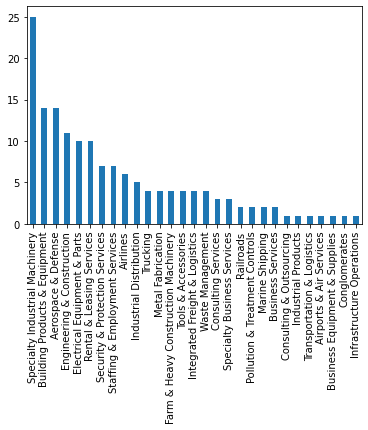

In [10]:
df_industry['industry'].value_counts().plot.bar();

### Key Metrics

In [11]:
def get_key_metrics_tickers(tickers, period):
    """
    Input: a list of stock tickers and period ('FY', or 'quarter')
    Output: pandas dataframe for selected key metrics
    """ 
    metrics = [
        'peRatio',
        'enterpriseValueOverEBITDA',
        'evToSales',
        'freeCashFlowYield',
        'debtToEquity',
        'roic',
        'roe',
        'salesGeneralAndAdministrativeToRevenue',
        'researchAndDdevelopementToRevenue'
    ]
    
    dataframes = []
    
    for ticker in (tickers):
        df = get_key_metrics(ticker, period)
        dataframes.append(df)
    df = pd.concat(dataframes)
    df['peRatio'] = pd.to_numeric(df['peRatio'])
    df['enterpriseValueOverEBITDA'] = pd.to_numeric(df['enterpriseValueOverEBITDA'])
    df['evToSales'] = pd.to_numeric(df['evToSales'])
    df['freeCashFlowYield'] = pd.to_numeric(df['freeCashFlowYield'])
    df['debtToEquity'] = pd.to_numeric(df['debtToEquity'])
    df['roic'] = pd.to_numeric(df['roic'])
    df['roe'] = pd.to_numeric(df['roe'])
    df['salesGeneralAndAdministrativeToRevenue'] = pd.to_numeric(df['salesGeneralAndAdministrativeToRevenue'])
    df['researchAndDdevelopementToRevenue'] = pd.to_numeric(df['researchAndDdevelopementToRevenue'])
    df_metrics = df[metrics]
    df_metrics = df_metrics.rename(columns={'enterpriseValueOverEBITDA': 'EV/EBITDA', 
                       'salesGeneralAndAdministrativeToRevenue': 'SG&A/revenue', 
                       'researchAndDdevelopementToRevenue': 'R&D/revenue' })
    
    return df_metrics


def make_comparison_plot(df_0, ticker_a, ticker_b, metrics):
    
    df_a = df_0.loc[ticker_a][metrics][:20].sort_index()
    df_b = df_0.loc[ticker_b][metrics][:20].sort_index()
    df = pd.concat([df_a, df_b], axis=1)
    df.columns = [metrics + '_' + ticker_a, metrics + '_' + ticker_b]
    ax = df.plot.bar(figsize=(10,7), grid=True)
    ax.set_xlabel('')
    ax.set_ylabel(metrics, fontsize=14)
    plt.tight_layout()
    
    return ax   

### Tickers selection
get quarterly key metrics for given sector and market cap

In [12]:
df_metrics_quarter = get_key_metrics_tickers(tickers, 'quarter')

In [13]:
#tickers_selected = df_metrics_quarter.index.get_level_values(0).unique().to_list()
#print("number of selected tickers =", len(tickers_selected))

In [14]:
# get interquartile range of P/E for the last four quarters
df_last4q = df_metrics_quarter.groupby('symbol').head(4)
pe_25 = df_last4q['peRatio'].groupby('symbol').min().describe()['25%']
pe_75 = df_last4q['peRatio'].groupby('symbol').max().describe()['75%']
IQR = pe_75 - pe_25
print("pe_25=", pe_25)
print("pe_75=", pe_75)
print("interquartile range=", IQR)

pe_25= -22.854212437963852
pe_75= 69.70810608836625
interquartile range= 92.5623185263301


In [15]:
# Remove outliers
tickers_ignored = set(df_last4q[(df_last4q['peRatio'] <= pe_25 - IQR*1.5) | (df_last4q['peRatio'] >= pe_75 + IQR*1.5)].index.get_level_values(0).unique())
all_tickers = set(df_metrics_quarter.index.get_level_values(0).unique())
tickers_selected = list(all_tickers - tickers_ignored)
print(tickers_selected)
print('\n')
print("number of selected tickers =", len(tickers_selected))

['GATX', 'CTOS', 'WERN', 'GTES', 'AEIS', 'TKR', 'SNDR', 'AAON', 'TTEK', 'SPXC', 'EAF', 'BMI', 'AMRC', 'ARNC', 'TEX', 'SPR', 'FIX', 'MSA', 'WTS', 'ALGT', 'FSS', 'PRG', 'FTAI', 'AL', 'CSL', 'MIC', 'HRI', 'AWI', 'SSW', 'SITE', 'CW', 'SKYW', 'HI', 'CLH', 'IBP', 'HLIO', 'EXPO', 'NLSN', 'WCC', 'ACA', 'CFX', 'KMT', 'IAA', 'WBT', 'ASGN', 'HUBG', 'CAR', 'ADT', 'FELE', 'AIT', 'FLR', 'MTZ', 'VVNT', 'RCII', 'BDC', 'ATI', 'BLD', 'SSD', 'SAVE', 'MWA', 'TRN', 'SAIA', 'MSM', 'R', 'AYR', 'JBT', 'FLOW', 'MATX', 'MMS', 'MLI', 'HII', 'LPX', 'FCEL', 'NSP', 'FWRD', 'JBLU', 'EME', 'KEX', 'OA', 'GWR', 'NAV', 'MIDD', 'PRLB', 'VMI', 'RHI', 'ACM', 'DCI', 'MOG-A', 'ITT', 'WWD', 'BE', 'ABM', 'LECO', 'AIMC', 'MRCY', 'VRT', 'GTLS', 'RBC', 'PSN', 'BECN', 'ALK', 'MLHR', 'BRC', 'SPCE', 'DY', 'KNX', 'RXN', 'AYI', 'ENR', 'CYRX', 'BMCH', 'CR', 'BWXT', 'LSTR', 'TNET', 'KBR', 'AQUA', 'ATKR', 'FCN', 'OSK', 'ROCK', 'AJRD', 'APG', 'WSC']


number of selected tickers = 124


In [16]:
# Selected tickers' statistic
quarterly_stat = df_metrics_quarter.loc[tickers_selected].describe().transpose()
quarterly_stat

,count,mean,std,min,25%,50%,75%,max
peRatio,9611.0,23.682687,397.620577,-4649.975453,9.259732,15.509742,22.752039,28802.026930
EV/EBITDA,9659.0,37.492614,621.965183,-11045.606667,21.303723,32.738068,45.438738,49904.400000
evToSales,9633.0,15.804822,281.470670,-135.429182,2.697571,4.232910,6.588278,15552.784695
freeCashFlowYield,9631.0,-0.405510,40.216306,-3945.904222,-0.007836,0.010333,0.026871,60.422005
debtToEquity,9657.0,-0.373662,96.739533,-9454.138122,0.112884,0.413689,0.905237,154.295455
roic,9609.0,0.031823,0.691806,-52.496144,0.016091,0.030830,0.048261,27.147860
roe,9657.0,1.152636,110.899001,-135.340517,0.016617,0.032050,0.048520,10896.591160
SG&A/revenue,9633.0,0.200219,8.324895,-212.336283,0.072293,0.139575,0.215038,582.148992
R&D/revenue,9633.0,0.035500,1.495220,-1.672411,0.000000,0.000000,0.000000,144.042017


(-1000.0, 1500.0)

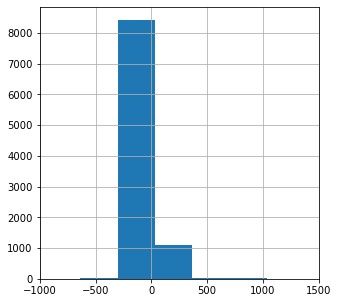

In [17]:
fig, ax = plt.subplots(figsize=(5,5))
df_metrics_quarter.loc[tickers_selected]['peRatio'].hist(bins=100)
ax.set_xlim(-1000, 1500)

### Get key metrics for selected tickers
FY key metrics are used to rank the stocks

In [18]:
df_metrics = get_key_metrics_tickers(tickers_selected, 'FY')
df_metrics.head()

peRatio  EV/EBITDA  evToSales  freeCashFlowYield  \
symbol date                                                             
GATX   2020-12-31  21.896630  13.524069   6.905194          -0.130548   
       2019-12-31  13.279318  11.507247   5.344950          -0.099872   
       2018-12-31  13.717860  11.568228   5.392669          -0.168151   
       2017-12-31   5.534024  10.728379   4.980449          -0.065441   
       2016-12-31   9.335006   9.555350   4.476860          -0.036125   

                   debtToEquity      roic       roe  SG&A/revenue  R&D/revenue  
symbol date                                                                     
GATX   2020-12-31      2.722489  0.032726  0.077296      0.000000          0.0  
       2019-12-31      2.604981  0.038854  0.115089      0.135314          0.0  
       2018-12-31      2.477322  0.042642  0.118170      0.140422          0.0  
       2017-12-31      2.438612  0.045692  0.280025      0.131818          0.0  
       2016-12-31      3.157067  0.053026  0.190840      0.123176          0.0

In [19]:
print("number of unique tickers =", df_metrics.dropna().index.get_level_values(0).nunique())

number of unique tickers = 122


In [20]:
FY_stat = df_metrics.dropna().describe().transpose()
FY_stat

,count,mean,std,min,25%,50%,75%,max
peRatio,2732.0,24.937797,432.995239,-9178.982680,7.907214,15.517093,22.862488,10698.504229
EV/EBITDA,2732.0,-164.821269,8831.106013,-461262.456441,5.341637,8.444792,11.964814,3640.833487
evToSales,2732.0,36.956135,1160.729213,-137.179456,0.621365,1.026365,1.660275,50160.959885
freeCashFlowYield,2732.0,0.825092,33.437212,-567.375887,0.001468,0.043939,0.081597,1463.519313
debtToEquity,2732.0,-2.367248,181.676912,-9454.138122,0.134953,0.470702,0.992590,832.000000
roic,2732.0,14.329908,743.123673,-2.394634,0.063152,0.116533,0.177655,38842.094656
roe,2732.0,21.622679,803.096399,-63.814815,0.064195,0.121319,0.174858,33568.286588
SG&A/revenue,2732.0,0.331174,10.149192,-183.501524,0.038380,0.131779,0.207097,489.882353
R&D/revenue,2732.0,0.273817,12.780304,0.000000,0.000000,0.000000,0.000000,667.046218


In [21]:
FY_stat['50%'].to_frame().transpose()

,peRatio,EV/EBITDA,evToSales,freeCashFlowYield,debtToEquity,roic,roe,SG&A/revenue,R&D/revenue
50%,15.517093,8.444792,1.026365,0.043939,0.470702,0.116533,0.121319,0.131779,0.0


In [22]:
df_metrics_sorted = df_metrics.dropna().groupby(level=0).median().sort_values(by=['peRatio', 'EV/EBITDA', 'evToSales', 'debtToEquity'])

(-1000.0, 1500.0)

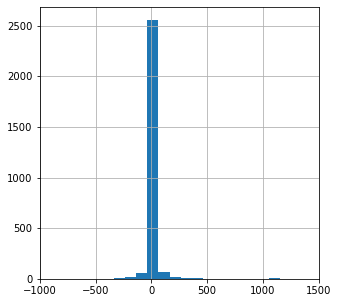

In [23]:
fig, ax = plt.subplots(figsize=(5,5))
df_metrics.loc[tickers_selected]['peRatio'].hist(bins=200)
ax.set_xlim(-1000, 1500)

In [24]:
df_metrics_filtered = df_metrics_sorted[(df_metrics_sorted['peRatio']>-250) & (df_metrics_sorted['peRatio']<500)]

In [25]:
df_metrics_filtered[50:60]

,peRatio,EV/EBITDA,evToSales,freeCashFlowYield,debtToEquity,roic,roe,SG&A/revenue,R&D/revenue
symbol,,,,,,,,,
CR,14.761478,7.841586,1.003823,0.069194,0.489577,0.143905,0.180590,0.206714,0.000000
SPR,14.791649,7.948883,0.947438,-0.002505,0.603165,0.130156,0.197057,0.033609,0.006931
RBC,14.938273,8.144048,1.074059,0.092186,0.497330,0.117857,0.108517,0.000000,0.000000
FIX,14.983042,9.240837,0.391585,0.058280,0.053724,0.128564,0.092153,0.140779,0.000000
FSS,15.020262,10.303768,1.089182,0.045615,0.329985,0.145504,0.135846,0.171604,0.000000
VMI,15.155358,7.599283,0.882550,0.032420,0.642562,0.144477,0.138843,0.163676,0.000000
HII,15.446754,7.575496,0.923254,0.068557,0.870632,0.141962,0.271805,0.095935,0.000000
CSL,15.626795,8.682745,0.947446,0.063908,0.402840,0.142310,0.128798,0.117843,0.009092
SNDR,15.929057,6.447157,0.816089,0.027566,0.152691,0.097104,0.114550,0.046140,0.000000


In [26]:
'RBC' in df_metrics_filtered.index.get_level_values(0)

True

In [27]:
df_metrics_filtered.dropna().groupby(level=0).mean().sort_values(by=['freeCashFlowYield', 'roic', 'roe'], ascending=False).head()

,peRatio,EV/EBITDA,evToSales,freeCashFlowYield,debtToEquity,roic,roe,SG&A/revenue,R&D/revenue
symbol,,,,,,,,,
IAA,17.207153,10.845073,2.939758,0.542416,0.763743,0.185489,0.227876,0.049555,0.000000
VVNT,-1.682288,-23.236766,2.630962,0.241751,-1.893372,-0.109608,0.325573,0.211885,0.000000
EAF,4.442643,5.600393,2.960426,0.217114,-2.263565,0.618542,-0.935387,0.045512,0.002373
SPXC,2.429027,4.214836,0.363144,0.138365,0.809741,0.078920,0.093126,0.189982,0.000000
CAR,5.137600,3.699380,1.275954,0.125207,1.552406,0.074272,0.131707,0.151750,0.000000


In [28]:
df_metrics_filtered.dropna().groupby(level=0).median().sort_values(by=['debtToEquity'], ascending=False).head(10)

,peRatio,EV/EBITDA,evToSales,freeCashFlowYield,debtToEquity,roic,roe,SG&A/revenue,R&D/revenue
symbol,,,,,,,,,
WBT,29.138520,15.900826,2.414526,-0.051624,6.347157,0.138214,0.320238,0.196965,0.000000
HRI,17.292023,5.255647,1.619789,-0.090329,4.894630,0.028194,0.036316,0.000000,0.000000
GATX,9.223279,9.568693,3.272129,-0.168201,3.143524,0.044485,0.126799,0.122364,0.000000
ADT,-10.669859,7.725412,3.267880,0.117295,2.939748,0.021545,-0.133198,0.274410,0.000000
AQUA,95.538140,15.483470,2.193006,0.006368,2.604719,0.045315,0.013663,0.139711,0.011222
ATKR,12.037801,9.338778,1.063269,0.104449,2.445309,0.170927,0.402479,0.124331,0.000000
AL,10.429150,10.278773,9.519733,-0.629179,2.400488,0.055193,0.092349,0.076856,0.000000
SSW,5.932223,8.918699,6.355610,-0.236027,2.378015,0.023924,0.075204,0.000000,0.000000
R,11.816418,4.097320,0.823385,-0.222380,2.104886,0.040791,0.126633,0.101659,0.000000


### Check interesting stocks
quarterly key metrics

In [ ]:
ticker_of_interest = 'RBC'

In [ ]:
profile = get_profile(ticker_of_interest)
profile.iloc[[0, 4, 9, 14, 15, 17, 19, 20,]]

In [ ]:
df_stock_metrics = df_metrics_quarter.loc[ticker_of_interest]
df_stock_metrics.head()

In [ ]:
quarterly_stat.loc[['peRatio', 'EV/EBITDA']]

In [ ]:
df_stock_metrics[['peRatio', 'EV/EBITDA']][:20].sort_index().plot.bar(grid=True, figsize=(10,7));
plt.axhline(y = quarterly_stat.loc['peRatio']['50%'], lw=1.2,ls='--', color='b');
plt.axhline(y = quarterly_stat.loc['EV/EBITDA']['50%'], lw=1.2,ls='--', color='r');

In [ ]:
quarterly_stat.loc[['evToSales']]

In [ ]:
df_stock_metrics['evToSales'][:20].sort_index().plot.bar(grid=True, figsize=(10,7), legend=True);
plt.axhline(y = quarterly_stat.loc['evToSales']['50%'], lw=1.2,ls='--', color='m');

In [ ]:
quarterly_stat.loc[['freeCashFlowYield']]

In [ ]:
df_stock_metrics['freeCashFlowYield'][:20].sort_index().plot.bar(grid=True, figsize=(10,7), legend=True);
plt.axhline(y = quarterly_stat.loc['freeCashFlowYield']['50%'], lw=1.2,ls='--', color='m');

In [ ]:
quarterly_stat.loc[['roic', 'roe']]

In [ ]:
df_stock_metrics[['roic', 'roe']][:20].sort_index().plot.bar(grid=True, figsize=(10,7), legend=True);
plt.axhline(y = quarterly_stat.loc['roic']['50%'], lw=1.2,ls='--', color='b');
plt.axhline(y = quarterly_stat.loc['roe']['50%'], lw=1.2,ls='--', color='r');

In [ ]:
quarterly_stat.loc[['debtToEquity']]

In [ ]:
df_stock_metrics['debtToEquity'][:20].sort_index().plot.bar(grid=True, figsize=(10,7), legend=True);
plt.axhline(y = quarterly_stat.loc['debtToEquity']['50%'], lw=1.2,ls='--', color='m');

### Income Statement

In [ ]:
df_income = get_income_statement(ticker_of_interest, 'FY')
df_income.head()

In [ ]:
df_income.loc[ticker_of_interest][['revenue', 'grossProfit', 'netIncome']].sort_index().plot.bar(figsize = (10,7));
plt.tight_layout()

In [ ]:
df_income.loc[ticker_of_interest][['netIncome']].sort_index().plot.bar(figsize = (10,7));
plt.tight_layout()

In [ ]:
df_income.loc[ticker_of_interest][['ebitda']].sort_index().plot.bar(figsize = (10,7));
plt.tight_layout()

In [ ]:
df_income.loc[ticker_of_interest][['eps']].sort_index().plot.bar(figsize = (10,7));
plt.tight_layout()

### Cashflow Statement

In [ ]:
df_cashflow = get_cash_flow_statement(ticker_of_interest, 'FY')
df_cashflow.head()

In [ ]:
df_cashflow.loc[ticker_of_interest][['freeCashFlow']].sort_index().plot.bar(figsize = (10,7));
plt.tight_layout()

### Comparison
check for both FY and quarter

In [ ]:
metrics = df_metrics.columns.to_list()

for metric in metrics:
    make_comparison_plot(df_metrics_quarter, 'CW', 'RBC', metric);

In [ ]:
earning_calender = get_earnings_calendar()

In [ ]:
earning_calender.loc['RBC']